In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Libraries

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from matplotlib.pyplot import imshow

# Make a Training Dataset

In [ ]:
train = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/training_set")

0 <PIL.Image.Image image mode=RGB size=300x280 at 0x7FF9DDC5BD60> 0


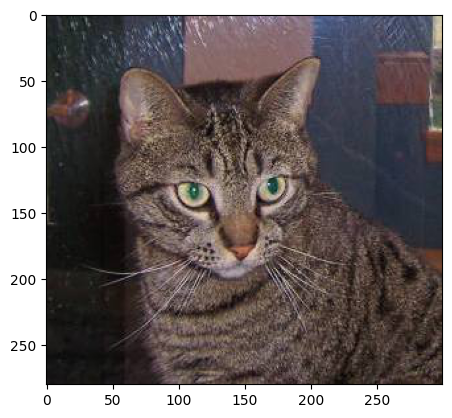

In [ ]:
for idx, value in enumerate(train):
  data, label = value
  print(idx, data, label)

  imshow(data)
  break

In [ ]:
trans = transforms.Compose([
    transforms.Resize((64, 128))
    ])

In [ ]:
train = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/training_set", transform=trans)

In [ ]:
for idx, value in enumerate(train):
  data, label = value
  print(idx, data, label)

  if(label==0):
    data.save("/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/train_data/cats/%d_%d.jpeg"%(idx, label))
  else:
    data.save("/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/train_data/dogs/%d_%d.jpeg"%(idx, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280550> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280490> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112804C0> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112803D0> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280580> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280400> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280760> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280430> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112804F0> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A1FCC6040> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280730> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112803A0> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280430> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11280340> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11

In [ ]:
test = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/test_set", transform=trans)

In [ ]:
for idx, value in enumerate(test):
  data, label = value
  print(idx, data, label)

  if(label==0):
    data.save("/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/test_data/cats/%d_%d.jpeg"%(idx, label))
  else:
    data.save("/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/test_data/dogs/%d_%d.jpeg"%(idx, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112FB2E0> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8AE6919460> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A1921B160> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112FB2E0> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112614F0> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112FB2E0> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8AE6919460> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112FB2E0> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112614F0> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A1126C7C0> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A112FB820> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A1126CD60> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8AE6919460> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A1126C6A0> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F8A11

# CNN Model with the Custom Image Dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
trans = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/train_data", transform=trans)

In [ ]:
train_loader = DataLoader(dataset =train_data, batch_size=5, shuffle = True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=1), #input_channel=1, output_channel=32, kernel_size=3
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # L1 ImgIn shape=(100, 1, 28, 28) #batch_size = 100, input_channel = 1, input size = 28 X 28
        #    Conv     -> (100, 32, 28, 28) #batch_size = 100, output_channel = 32, input size = 28 X 28
        #    Pool     -> (?, 32, 14, 14) #batch_size = 100, output_channel = 32, input size = 14 X 14

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # L2 ImgIn shape=(100, 32, 14, 14) #batch_size = 100, input_channel = 32, input size = 14 X 14
        #    Conv      ->(100, 64, 14, 14) #batch_size = 100, input_channel = 64, input size = 14 X 14
        #    Pool      ->(100, 64, 7, 7) #batch_size = 100, input_channel = 64, input size = 7 X 7

        # L3 FC 7x7x64 inputs -> 3136 outputs
        self.fc = torch.nn.Linear(16 * 30 * 14, 2, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)

        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc(out)
        return out

In [ ]:
model = CNN().to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss() #Softmax is internally computed
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
total_batch = len(train_loader)

for epoch in range(30):
    avg_cost = 0

    for idx, data in enumerate(train_loader):
      X, Y = data
      X = X.to(device)
      Y = Y.to(device)

      optimizer.zero_grad()
      pred = model(X).to(device)
      cost = loss(pred, Y).to(device)
      cost.backward()
      optimizer.step()

      avg_cost += cost / total_batch

    print("Epoch: {:4d} / {} Cost: {:.6f}".format(epoch+1, 20, avg_cost))

print('Learning Finished!')

Epoch:    1 / 20 Cost: 0.704349
Epoch:    2 / 20 Cost: 0.691398
Epoch:    3 / 20 Cost: 0.685141
Epoch:    4 / 20 Cost: 0.681143
Epoch:    5 / 20 Cost: 0.675956
Epoch:    6 / 20 Cost: 0.661474
Epoch:    7 / 20 Cost: 0.646354
Epoch:    8 / 20 Cost: 0.639196
Epoch:    9 / 20 Cost: 0.627384
Epoch:   10 / 20 Cost: 0.606810
Epoch:   11 / 20 Cost: 0.588133
Epoch:   12 / 20 Cost: 0.575713
Epoch:   13 / 20 Cost: 0.582823
Epoch:   14 / 20 Cost: 0.561535
Epoch:   15 / 20 Cost: 0.532877
Epoch:   16 / 20 Cost: 0.524742
Epoch:   17 / 20 Cost: 0.506171
Epoch:   18 / 20 Cost: 0.502017
Epoch:   19 / 20 Cost: 0.494448
Epoch:   20 / 20 Cost: 0.493072
Epoch:   21 / 20 Cost: 0.468637
Epoch:   22 / 20 Cost: 0.450665
Epoch:   23 / 20 Cost: 0.444069
Epoch:   24 / 20 Cost: 0.450551
Epoch:   25 / 20 Cost: 0.429085
Epoch:   26 / 20 Cost: 0.424262
Epoch:   27 / 20 Cost: 0.410115
Epoch:   28 / 20 Cost: 0.387830
Epoch:   29 / 20 Cost: 0.390928
Epoch:   30 / 20 Cost: 0.380031
Learning Finished!


In [ ]:
test = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/NCC/CSCI464/Datasets/Animals(V2)/test_data', transform=trans)

In [ ]:
test_loader = DataLoader(dataset = test, batch_size = len(test), shuffle = True)

In [ ]:
model.eval()

with torch.no_grad():
    for idx, data in enumerate(test_loader):
        x_test, y_test = data
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        pred = model(x_test)

        correct_prediction = torch.argmax(pred, 1) == label

        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 0.6399999856948853


# Deeper CNN Structure

In [ ]:
class CNN1(torch.nn.Module):

    def __init__(self):
        super(CNN1, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 10, kernel_size=(3, 2), stride=2, padding=3), #input_channel=3, output_channel=10, kernel_size=3X2
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=(2, 3), stride=1))

        # L1 ImgIn shape=(100, 1, 28, 28) #batch_size = 100, input_channel = 1, input size = 28 X 28
        #    Conv     -> (100, 32, 28, 28) #batch_size = 100, output_channel = 32, input size = 28 X 28
        #    Pool     -> (?, 32, 14, 14) #batch_size = 100, output_channel = 32, input size = 14 X 14

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(10, 24, kernel_size=4, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2))


        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(24, 32, kernel_size=2, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=1))

        # L3 FC 32x16x8 inputs -> 4,096 outputs
        self.fc1 = torch.nn.Linear(32 * 16 * 8, 32, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)

        self.fc2 = torch.nn.Linear(32, 2, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
model = CNN1().to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss() #Softmax is internally computed
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
total_batch = len(train_loader)

for epoch in range(30):
    avg_cost = 0

    for idx, data in enumerate(train_loader):
      X, Y = data
      X = X.to(device)
      Y = Y.to(device)

      optimizer.zero_grad()
      pred = model(X).to(device)
      cost = loss(pred, Y).to(device)
      cost.backward()
      optimizer.step()

      avg_cost += cost / total_batch

    print("Epoch: {:4d} / {} Cost: {:.6f}".format(epoch+1, 30, avg_cost))

print('Learning Finished!')

Epoch:    1 / 20 Cost: 0.711293
Epoch:    2 / 20 Cost: 0.712830
Epoch:    3 / 20 Cost: 0.695112
Epoch:    4 / 20 Cost: 0.686215
Epoch:    5 / 20 Cost: 0.685191
Epoch:    6 / 20 Cost: 0.680875
Epoch:    7 / 20 Cost: 0.675260
Epoch:    8 / 20 Cost: 0.672698
Epoch:    9 / 20 Cost: 0.665239
Epoch:   10 / 20 Cost: 0.659751
Epoch:   11 / 20 Cost: 0.648788
Epoch:   12 / 20 Cost: 0.631878
Epoch:   13 / 20 Cost: 0.632385
Epoch:   14 / 20 Cost: 0.612677
Epoch:   15 / 20 Cost: 0.598038
Epoch:   16 / 20 Cost: 0.585692
Epoch:   17 / 20 Cost: 0.572091
Epoch:   18 / 20 Cost: 0.565692
Epoch:   19 / 20 Cost: 0.550022
Epoch:   20 / 20 Cost: 0.530694
Epoch:   21 / 20 Cost: 0.547520
Epoch:   22 / 20 Cost: 0.508374
Epoch:   23 / 20 Cost: 0.491489
Epoch:   24 / 20 Cost: 0.490175
Epoch:   25 / 20 Cost: 0.461419
Epoch:   26 / 20 Cost: 0.447955
Epoch:   27 / 20 Cost: 0.437253
Epoch:   28 / 20 Cost: 0.419606
Epoch:   29 / 20 Cost: 0.402605
Epoch:   30 / 20 Cost: 0.411333
Learning Finished!


In [ ]:
model.eval()

with torch.no_grad():
    for idx, data in enumerate(test_loader):
        x_test, y_test = data
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        pred = model(x_test)

        correct_prediction = torch.argmax(pred, 1) == label

        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 0.5899999737739563
